In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the file
df = pd.read_csv('CarBuyers.csv')

In [3]:
# Dropping the column Unknown 
df = df.drop(columns='Unknown')

In [4]:
# To check if there is any null values in any column
df.isnull().sum()

Manufacturer    0
Model           0
Price           0
Transmission    0
Power           0
Engine CC       0
Fuel            0
Male            0
Female          0
Total           0
dtype: int64

In [5]:
# Shows the datatype of each column in the dataframe
df.dtypes

Manufacturer     object
Model            object
Price           float64
Transmission    float64
Power           float64
Engine CC       float64
Fuel             object
Male             object
Female           object
Total            object
dtype: object

In [6]:
# Converting the columns with object datatype to integer datatype
def to_integer(x):                               # Function to remove ',' in the digits
    return(int(x.replace(',','')))    
for i in ['Male', 'Female', 'Total']:            # Converts each no. in each cell of the particular column
    df[i] = df[i].map(to_integer)                # to the no. with "," and the column gets converted to integer datatype

In [7]:
df.dtypes

Manufacturer     object
Model            object
Price           float64
Transmission    float64
Power           float64
Engine CC       float64
Fuel             object
Male              int64
Female            int64
Total             int64
dtype: object

In [8]:
# New dataframe with the data grouped by the all the features present in the old dataframe 'df'
new_df = df.groupby(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC','Fuel'],as_index=False).sum()
new_df

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,7124,4719,12413
1,Alfa-Romeo,145,17.427143,5.000000,87.714286,1696.428571,petrol,29993,11855,44034
2,Alfa-Romeo,146,18.198429,5.000000,87.714286,1696.428571,petrol,40928,14231,58128
3,Alfa-Romeo,147,25.343387,5.193548,95.096774,1802.774194,petrol,149499,83501,246278
4,Alfa-Romeo,155,23.909333,5.000000,100.666667,2016.777778,petrol,28860,4422,34473
...,...,...,...,...,...,...,...,...,...,...
497,Volvo,V50,36.524191,5.176471,113.352941,2106.500000,petrol,154491,59796,227447
498,Volvo,V60,50.484130,7.304348,150.608696,1969.000000,diesel,7831,2169,10720
499,Volvo,V70,50.961091,6.181818,135.290909,1971.163636,diesel,703323,167052,928874
500,Volvo,XC70,58.469074,6.444444,148.518518,2174.037037,diesel,60529,17470,83607


In [9]:
# Shape of the new dataframe
new_df.shape

(502, 10)

In [10]:
# To find the no. of the unique datas in the column 'Manufacturer'
len(new_df['Manufacturer'].unique())

52

In [11]:
# To find the unique datas in the column 'Fuel'
new_df['Fuel'].unique()

array(['petrol', 'diesel', 'automatic'], dtype=object)

In [12]:
# Finds the no. of entries present with the same manufacturer
new_df['Manufacturer'].value_counts()

Peugeot         31
Audi            24
Ford            24
Fiat            23
Renault         23
Volkswagen      23
Toyota          23
Nissan          22
Hyundai         19
Citroen         18
Mercedes        17
Honda           17
Volvo           17
Mazda           16
BMW             15
Suzuki          13
Kia             13
Skoda           12
Alfa-Romeo      12
Seat            11
Mitsubishi       9
Chevrolet        9
Porsche          8
Opel             7
Rover            6
Subaru           6
Jaguar           6
Chrysler         6
Saab             5
Daihatsu         5
Mini             5
Smart            4
Ssangyong        4
MG               4
Land-Rover       4
Lancia           4
Daewoo           4
Lexus            3
Dodge            3
Datsun           3
Daimler          3
Aston-Martin     3
Lada             3
TVR              2
Triumph          2
Lotus            2
Morris           2
Ferrari          2
Dacia            2
Maserati         1
Bentley          1
Abarth           1
Name: Manufa

Text(0.5, 1.0, 'Comparison between which fuel catgory cars were preferred the most')

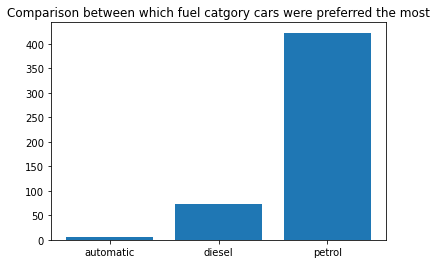

In [13]:
fuel = new_df.groupby('Fuel', as_index=False)['Model'].count()    # Gets the count of how many models of a particular fuel types are bought
plt.bar(fuel['Fuel'],fuel['Model']) # From a bar chart, we can see which groups are highest or most common, 
                                    # and how other groups compare against the others.
plt.title("Comparison between which fuel catgory cars were preferred the most")

In [14]:
df_gender = pd.DataFrame({'Gender':['Male', 'Female']})      # A new dataframe that includes only the datas of column Male and Female
df_gender['Count'] = df_gender['Gender'].apply(lambda x: new_df[x].sum())           # To find the total no. of male and female buyers
df_gender['%'] = df_gender['Count'].apply(lambda x: x/df_gender['Count'].sum())     # To find the percentage value of the count
df_gender

,Gender,Count,%
0,Male,200576818,0.621532
1,Female,122136776,0.378468


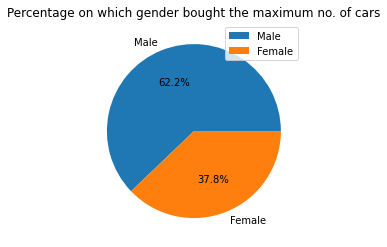

In [15]:
# Pie charts is used for showing the relationship of parts to the whole when there are a small number of levels.
plt.pie(df_gender['%'],labels = df_gender['Gender'],autopct='%1.1f%%')
plt.legend()
plt.title("Percentage on which gender bought the maximum no. of cars")
plt.show()

In [16]:
# List of all luxury car brands from the dataset
lxry = ["Audi","Mercedes","Volvo","BMW","Alfa-Romeo","Porsche","Rover","Land Rover","Jaguar",
                    "Lotus","Aston-Martin","Triumph","Mini","Lexus","Ferrari","Bentley","Maserati"]

In [17]:
# A new dataframe with details of only the brands that are in the list 'lxry'
luxury_cars = new_df[new_df["Manufacturer"].isin(lxry)]

In [18]:
top_lxry_buys = luxury_cars.groupby(['Model','Manufacturer'], as_index=False)['Fuel','Price','Male', 'Female','Total'].sum()

/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_12723/3765354270.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_lxry_buys = luxury_cars.groupby(['Model','Manufacturer'], as_index=False)['Fuel','Price','Male', 'Female','Total'].sum()


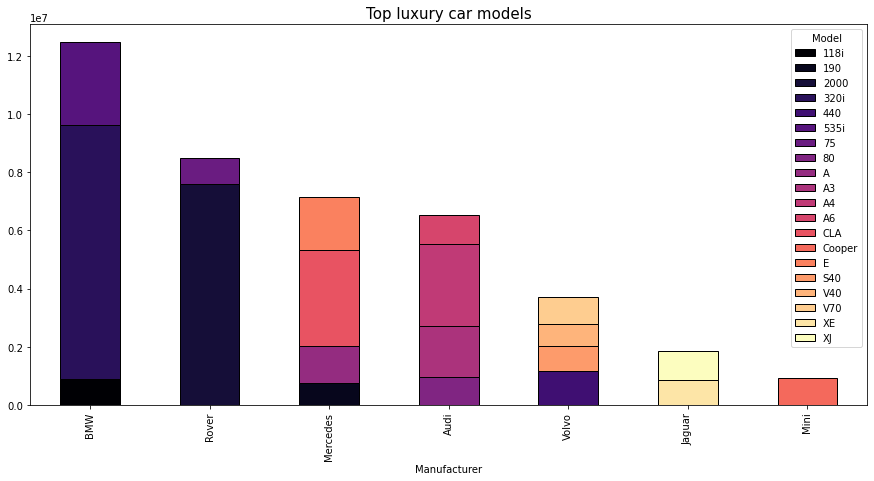

In [19]:
# Stacked Bar Graphs are used to show how a larger category is divided into smaller categories and what the relationship of each part has on the total amount.
top_lxry_model = top_lxry_buys.sort_values('Total',ascending = False).head(20).pivot_table(index = 'Manufacturer',
                 margins = True,aggfunc = np.sum,columns = 'Model',values = 'Total').sort_values('All',ascending = False)
fig,ax = plt.subplots(figsize = (15,7))
top_lxry_model.iloc[1:,:-1].plot(kind = 'bar', stacked = 'True', ax = ax, cmap = 'magma', edgecolor = 'black')
ax.set_title('Top luxury car models', fontsize = 15);

In [20]:
# Shows 4 highest sold car brand
top_lxry_buys.head(4)

,Model,Manufacturer,Price,Male,Female,Total
0,100,Audi,37.326360,290434,55293,359404
1,118i,BMW,37.426500,454389,393075,899394
2,145,Alfa-Romeo,17.427143,29993,11855,44034
3,146,Alfa-Romeo,18.198429,40928,14231,58128


In [21]:
# Shows 4 lowest sold car brand
top_lxry_buys.tail(4)

,Model,Manufacturer,Price,Male,Female,Total
120,XK,Jaguar,145.646667,177439,28043,215339
121,XKR,Jaguar,171.133333,22692,2813,26749
122,Z3,BMW,39.737400,155627,107143,280810
123,Z4,BMW,64.109625,126746,59357,198718


In [22]:
# List of all commercial car brands from the dataset
cmmercl = ["Ford","Peugeot","Toyota","Fiat","Volkswagen","Nissan","Renault","Honda","Mazda","Citroen","Hyundai","Suzuki","Mitsubishi","Kia","Seat","Skoda","Suburu","Saab","Chrysler","Daewoo","Chevrolet","Daimler","Daihatsu","MG","Smart","Lancia",
           "Ssangyong","Datsun","Lada","Dodge","Morris","TVR","Abarth","Dacia"]

In [23]:
# A new dataframe with details of only the brands that are in the list 'cmmercl'
commercial_cars = new_df[new_df["Manufacturer"].isin(cmmercl)]

In [24]:
commercial_cars

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,7124,4719,12413
56,Chevrolet,Aveo,18.615000,5.200000,69.600000,1330.400000,petrol,23735,22648,48696
57,Chevrolet,Captiva,55.620000,6.000000,145.750000,2460.750000,petrol,20258,10526,32406
58,Chevrolet,Cruze,28.170000,5.583333,103.000000,1706.333333,petrol,8445,2509,11476
59,Chevrolet,Kalos,14.224091,4.727273,64.454545,1353.363636,petrol,46461,47446,98871
...,...,...,...,...,...,...,...,...,...,...
480,Volkswagen,Touareg,94.098125,8.000000,190.000000,2967.000000,diesel,86872,30965,123040
481,Volkswagen,Touran,32.985577,6.230769,94.038462,1528.807692,diesel,241607,143740,411234
482,Volkswagen,Transporter,35.376458,6.000000,103.083333,1968.000000,diesel,12198,3198,16254
483,Volkswagen,Up,17.065625,5.125000,51.375000,999.000000,petrol,14600,25079,41185


In [25]:
top_comrcl_buys = commercial_cars.groupby(['Model','Manufacturer'], as_index=False)['Fuel','Price','Male', 'Female','Total'].sum()

/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_12723/3685860937.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_comrcl_buys = commercial_cars.groupby(['Model','Manufacturer'], as_index=False)['Fuel','Price','Male', 'Female','Total'].sum()


In [26]:
# Shows 4 highest sold car brand
top_comrcl_buys.head(4)

,Model,Manufacturer,Price,Male,Female,Total
0,09-May,Saab,52.957194,374012,70387,471084
1,1007,Peugeot,18.657000,23987,24239,50864
2,104,Peugeot,7.508333,5736,4970,10999
3,105,Skoda,4.626333,13619,7141,21131


In [27]:
# Shows 4 lowest sold car brand
top_comrcl_buys.tail(4)

,Model,Manufacturer,Price,Male,Female,Total
357,ZR,MG,21.023333,284720,169018,470749
358,ZS,MG,30.990000,142161,37318,184882
359,ZT,MG,42.746667,140087,21114,166236
360,ZX,Citroen,16.056769,973176,484226,1527439


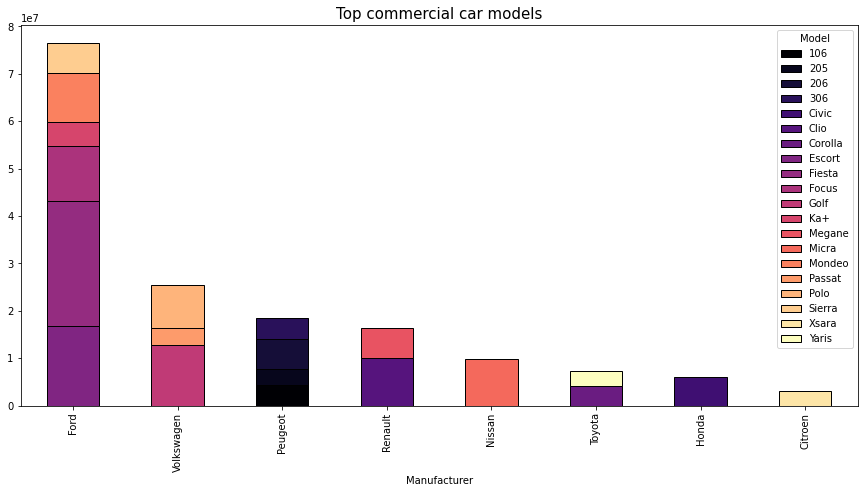

In [28]:
# Stacked Bar Graphs are used to show how a larger category is divided into smaller categories and what the relationship of each part has on the total amount.
top_comrcl_model = top_comrcl_buys.sort_values('Total',ascending = False).head(20).pivot_table(index = 'Manufacturer',
                 margins = True,aggfunc = np.sum,columns = 'Model',values = 'Total').sort_values('All',ascending = False)
fig,ax = plt.subplots(figsize = (15,7))
top_comrcl_model.iloc[1:,:-1].plot(kind = 'bar', stacked = 'True', ax = ax, cmap = 'magma', edgecolor = 'black')
ax.set_title('Top commercial car models', fontsize = 15);